# HW6-课后练习

<span style="color:red; font-weight:bold;">此次作业是课后练习，供大家熟练课堂上讲授的知识点，不计入任何分数。</span>

<span style="color:red; font-weight:bold;">请将作业命名为 HW6-课后练习+姓名+学号.ipynb, 例如 HW6-课后练习+张三+1000000000.ipynb</span>

## 请认真阅读代码，理解numpy相关基本操作

### 0.1
* 能否广播必须从数组的最高维向最低维看去，依次对比两个要进行运算的数组的axis的数据宽度是否相等，如果在某一个axis下，一个数据宽度为1，另一个数据宽度不为1，那么numpy就可以进行广播；但是一旦出现了在某个axis下两个数据宽度不相等，并且两者全不为1的状况，就无法广播264

In [250]:
import numpy as np

a0 = np.array([[1,2,3],[4,5,6]])
b0 = np.array([[10],[20]])
print(a0.shape)
print(b0.shape)
print(a0+b0) # b0广播为2x3
print()

a1 = np.arange(30).reshape(2, 3, 5)
b1 = np.arange(3).reshape(3, 1)
print(a1)
print(b1) # b1广播为2x3x5
print(a1+b1)
print()

a2 = np.arange(48).reshape(8, 1, 6, 1) # a2广播为8x7x6x5
b2 = np.arange(35).reshape(   7, 1, 5) # b2广播为8x7x6x5
print(a2)
print(b2)
print((a2*b2).shape)

(2, 3)
(2, 1)
[[11 12 13]
 [24 25 26]]

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]
[[0]
 [1]
 [2]]
[[[ 0  1  2  3  4]
  [ 6  7  8  9 10]
  [12 13 14 15 16]]

 [[15 16 17 18 19]
  [21 22 23 24 25]
  [27 28 29 30 31]]]

[[[[ 0]
   [ 1]
   [ 2]
   [ 3]
   [ 4]
   [ 5]]]


 [[[ 6]
   [ 7]
   [ 8]
   [ 9]
   [10]
   [11]]]


 [[[12]
   [13]
   [14]
   [15]
   [16]
   [17]]]


 [[[18]
   [19]
   [20]
   [21]
   [22]
   [23]]]


 [[[24]
   [25]
   [26]
   [27]
   [28]
   [29]]]


 [[[30]
   [31]
   [32]
   [33]
   [34]
   [35]]]


 [[[36]
   [37]
   [38]
   [39]
   [40]
   [41]]]


 [[[42]
   [43]
   [44]
   [45]
   [46]
   [47]]]]
[[[ 0  1  2  3  4]]

 [[ 5  6  7  8  9]]

 [[10 11 12 13 14]]

 [[15 16 17 18 19]]

 [[20 21 22 23 24]]

 [[25 26 27 28 29]]

 [[30 31 32 33 34]]]
(8, 7, 6, 5)


### 0.2 Operation on a given axis

In [251]:
a0 = np.arange(6).reshape(2,3)
# [[0,1,2],
#  [3,4,5]]
print(np.mean(a0))
print(np.max(a0, axis=0)) # 沿着第0维比较，axis=i -> 沿着第i个下标变化的方向进行操作
print(np.argmax(a0, axis=0))
print(np.min(a0, axis=1))

2.5
[3 4 5]
[1 1 1]
[0 3]


### 0.3 Manipulating shape

In [252]:
a = np.arange(6)
a.resize(3, 2)
## Notice the difference between reshape and resize!
# `resize` modifies the array in-place, and does not return values.
a.reshape(2, 3) 
# `reshape` only returns the reshaped result, and does not change the array.
print(a.shape) # 3x2
a = a.reshape(2, 3)
print(a.shape) # 2x3
a = a.reshape(-1, 2) 
# `-1' means that the value is inferred from the length of the array and remaining dimensions.
print(a)
# [[0 1]
#  [2 3]
#  [4 5]]
a = a.T
print(a)
# [[0 2 4]
#  [1 3 5]]
print(a.ravel()) # default order: C (for C/C++ order)
# numpy.flatten()返回拷贝，numpy.ravel()返回引用
# A flattened array, `order` can be specified.
print(a.ravel('F')) # Fortran-style order （按列展开）

(3, 2)
(2, 3)
[[0 1]
 [2 3]
 [4 5]]
[[0 2 4]
 [1 3 5]]
[0 2 4 1 3 5]
[0 1 2 3 4 5]


### 0.4 numpy.dot
进一步探索细节请查阅[文档](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

In [253]:
import numpy as np

a0 = np.random.rand(30)
b0 = np.arange(30)/30
dot0 = np.dot(a0, b0)
print(a0.shape, b0.shape, dot0.shape, (a0@b0).shape, sep='\t\t')
# Equivalent to inner product for 1D array
assert(np.inner(a0, b0) == dot0)
a1 = a0.reshape(-1, 5)
b1 = b0.reshape(5, -1)
dot1 = np.dot(a1, b1)
assert((np.matmul(a1, b1) == dot1).all)
# Matrix multiplication, `np.matmul(a1, b1)` or `a1 @ b1` is preferred. 点乘多用于向量点积
print(a1.shape, b1.shape, dot1.shape, (a1@b1).shape, sep='\t\t')
a2 = a1
b2 = b1[..., 0]
dot2 = np.dot(a2, b2)
print(a2.shape, b2.shape, dot2.shape, (a2@b2).shape, sep='\t\t')
a3 = a0.reshape(2, -1, 5)
b3 = b0.reshape(2, 5, -1)
dot3 = np.dot(a3, b3)
# This is a bit counter-intuitive, so use `np.dot` carefully. ^_^
print(a3.shape, b3.shape, dot3.shape, (a3@b3).shape, sep='\t')

(30,)		(30,)		()		()
(6, 5)		(5, 6)		(6, 6)		(6, 6)
(6, 5)		(5,)		(6,)		(6,)
(2, 3, 5)	(2, 5, 3)	(2, 3, 2, 3)	(2, 3, 3)


## 初步练习

请你创建矩阵$A, B, C, D$，它们都是服从标准正态分布的矩阵，其中$A$的大小为$20\times 40$，$B$的大小为$40\times 40$，$C$的大小为$40\times 1$, $D$的大小为$40 \times 1$.

In [254]:
import numpy as np
np.random.seed(1)
#TODO
A = np.random.randn(20, 40)
B = np.random.randn(40, 40)
C = np.random.randn(40, 1)
D = np.random.randn(40, 1)
print(A)
print(B)
print(C)
print(D)

[[ 1.62434536e+00 -6.11756414e-01 -5.28171752e-01 -1.07296862e+00
   8.65407629e-01 -2.30153870e+00  1.74481176e+00 -7.61206901e-01
   3.19039096e-01 -2.49370375e-01  1.46210794e+00 -2.06014071e+00
  -3.22417204e-01 -3.84054355e-01  1.13376944e+00 -1.09989127e+00
  -1.72428208e-01 -8.77858418e-01  4.22137467e-02  5.82815214e-01
  -1.10061918e+00  1.14472371e+00  9.01590721e-01  5.02494339e-01
   9.00855949e-01 -6.83727859e-01 -1.22890226e-01 -9.35769434e-01
  -2.67888080e-01  5.30355467e-01 -6.91660752e-01 -3.96753527e-01
  -6.87172700e-01 -8.45205641e-01 -6.71246131e-01 -1.26645989e-02
  -1.11731035e+00  2.34415698e-01  1.65980218e+00  7.42044161e-01]
 [-1.91835552e-01 -8.87628964e-01 -7.47158294e-01  1.69245460e+00
   5.08077548e-02 -6.36995647e-01  1.90915485e-01  2.10025514e+00
   1.20158952e-01  6.17203110e-01  3.00170320e-01 -3.52249846e-01
  -1.14251820e+00 -3.49342722e-01 -2.08894233e-01  5.86623191e-01
   8.38983414e-01  9.31102081e-01  2.85587325e-01  8.85141164e-01
  -7.5439

### 计算$R=A+A$, $R=A^TA$, $R=AB$, $R=B-I$。

In [255]:
#TODO
I = np.eye(40)
print(A + A)
print(A.T @ A)
print(A @ B)
print(B - I)

[[ 3.24869073e+00 -1.22351283e+00 -1.05634350e+00 -2.14593724e+00
   1.73081526e+00 -4.60307739e+00  3.48962353e+00 -1.52241380e+00
   6.38078192e-01 -4.98740751e-01  2.92421587e+00 -4.12028142e+00
  -6.44834408e-01 -7.68108709e-01  2.26753888e+00 -2.19978253e+00
  -3.44856415e-01 -1.75571684e+00  8.44274934e-02  1.16563043e+00
  -2.20123835e+00  2.28944742e+00  1.80318144e+00  1.00498868e+00
   1.80171190e+00 -1.36745572e+00 -2.45780451e-01 -1.87153887e+00
  -5.35776159e-01  1.06071093e+00 -1.38332150e+00 -7.93507054e-01
  -1.37434540e+00 -1.69041128e+00 -1.34249226e+00 -2.53291978e-02
  -2.23462070e+00  4.68831396e-01  3.31960435e+00  1.48408832e+00]
 [-3.83671105e-01 -1.77525793e+00 -1.49431659e+00  3.38490920e+00
   1.01615510e-01 -1.27399129e+00  3.81830969e-01  4.20051027e+00
   2.40317905e-01  1.23440622e+00  6.00340640e-01 -7.04499693e-01
  -2.28503640e+00 -6.98685445e-01 -4.17788467e-01  1.17324638e+00
   1.67796683e+00  1.86220416e+00  5.71174651e-01  1.77028233e+00
  -1.5087

计算方程组的解。

$$
\left\{\begin{aligned}
2 x_{1}+x_{2}+x_{3} &=5 \\
3 x_{1}+2 x_{2}+ 2 x_{3} &=8 \\
x_{2}+2 x_{3} &=2
\end{aligned}\right.
$$

In [256]:
# TODO
A = np.array([[2, 1, 1],
            [3, 2, 2],
            [0, 1, 2]])
B = np.array(
    [[5],
    [8],
    [2]])
x = np.linalg.solve(A, B)
print(x)

[[ 2.00000000e+00]
 [-1.33226763e-15]
 [ 1.00000000e+00]]


## 使用numpy实现K-means聚类

### 1.创建数据集
请使用numpy创建一个在[0,1)上的形状为(10,2)的矩阵

In [257]:
import numpy as np
np.random.seed(1)
def create_random_dataset(num_samples=10, dimensions=2):
    #TODO
    return np.random.rand(10, 2)

dataset = create_random_dataset(10, 2)
dataset

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01],
       [1.46755891e-01, 9.23385948e-02],
       [1.86260211e-01, 3.45560727e-01],
       [3.96767474e-01, 5.38816734e-01],
       [4.19194514e-01, 6.85219500e-01],
       [2.04452250e-01, 8.78117436e-01],
       [2.73875932e-02, 6.70467510e-01],
       [4.17304802e-01, 5.58689828e-01],
       [1.40386939e-01, 1.98101489e-01]])

### 2.绘制散点图
请使用matplotlib绘制这个数据集的散点图

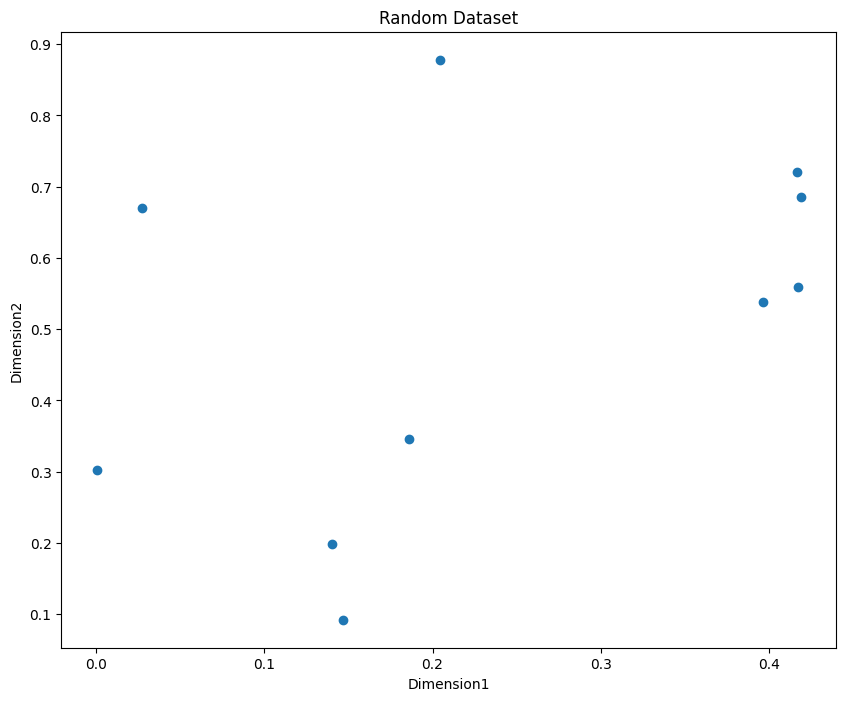

In [258]:
import matplotlib.pyplot as plt

def plot_dataset(dataset):
    #TODO
    plt.scatter(dataset[:, 0], dataset[:, 1]) # 散点图
    plt.title('Random Dataset')
    plt.xlabel('Dimension1')
    plt.ylabel('Dimension2')
    plt.show()
plot_dataset(dataset)


### 3.使用numpy计算两个点之间的L2距离

In [259]:
def euclidean_distance(point1, point2):
    #TODO
    return np.linalg.norm(point1 - point2, axis=0)
distance = euclidean_distance(dataset[0], dataset[1])
distance

0.5903636317721634

### 4. 初始化质心
在dataset数据集上随机选择k个点作为质心

In [260]:
def initialize_centroids(dataset, k):
    #TODO
    return np.random.rand(3, 2)
centroids = initialize_centroids(dataset, 3)
centroids

array([[0.80074457, 0.96826158],
       [0.31342418, 0.69232262],
       [0.87638915, 0.89460666]])

### 5. 聚类分配
对于数据集上每一个点，计算其与每个质心的距离，并选择最近的质心作为属于该质心的类。输出是一个一维向量clusters，clusters[i]代表数据集中第i个向量属于质心向量中的第几个质心

In [261]:
centroids[:, None].shape # 每个元素升一维，利用广播机制3x10x2

(3, 1, 2)

In [262]:
dataset.shape #广播为3x10x2

(10, 2)

In [263]:
def assign_clusters(dataset, centroids):
    #TODO
    return np.argmin(np.linalg.norm(dataset - centroids[:, None], axis=2), axis=0)
clusters = assign_clusters(dataset, centroids)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 6. 更新质心
新的质心等于当前属于该质心的点集的质心。

In [264]:
def update_centroids(dataset, clusters, k):
    #TODO
    new_centroids = centroids
    for i in range(k):
        tmp = dataset[clusters == i] # ！
        if len(tmp) > 0:
            new_centroids[i] = np.mean(tmp, axis=0)
    return new_centroids
new_centroids = update_centroids(dataset, clusters, 3)
new_centroids

array([[0.80074457, 0.96826158],
       [0.23556461, 0.49899689],
       [0.87638915, 0.89460666]])

### 7. 迭代和收敛
综合以上步骤，不断迭代直到质心收敛，实现最终的kmeans算法。

In [265]:
def kmeans(dataset, k, max_iters=400):
    #TODO
    centroids = initialize_centroids(dataset, k)
    for i in range(max_iters):
        clusters = assign_clusters(dataset, centroids)
        centroids = update_centroids(dataset, clusters, k)
    return clusters, centroids
# 示例调用
clusters, centroids = kmeans(dataset, 3)
clusters, centroids

(array([2, 0, 0, 0, 2, 2, 1, 1, 2, 0]),
 array([[0.11837935, 0.23458335],
        [0.11591992, 0.77429247],
        [0.4125722 , 0.62576264]]))

### 8. 可视化最终结果
使用plt.scatter函数画出数据集的散点图，不同的类用不同的颜色表示，质心用特殊符号'X'表示。

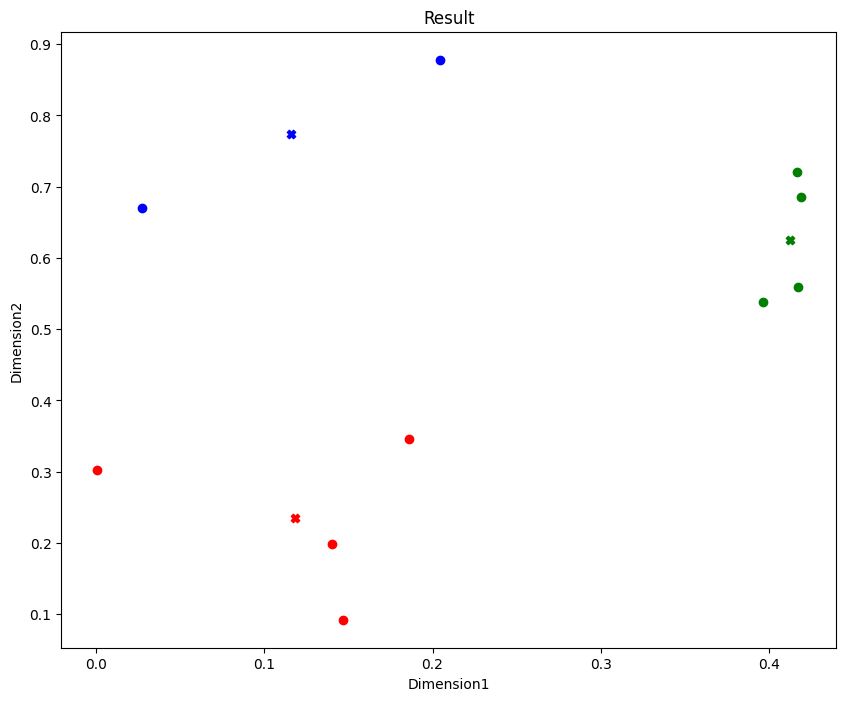

In [266]:
def plot_final_results(dataset, clusters, centroids):
    #TODO
    c = ['red', 'blue', 'green']
    for i in range(centroids.shape[0]):
        tmp = dataset[clusters == i]
        plt.scatter(tmp[:, 0], tmp[:, 1], color = c[i])
        plt.scatter(centroids[i, 0], centroids[i, 1], color = c[i], marker = 'X')
    
    plt.title('Result')
    plt.xlabel('Dimension1')
    plt.ylabel('Dimension2')
    plt.show()
plot_final_results(dataset, clusters, centroids)


### 9.向量化加速K-means算法
下面给出了一种较为低效的逐元素K-means算法，你需要将这个K-means算法向量化，充分利用numpy的特性，然后比较两种算法的运行时间。

#### 逐元素版本

2024-03-18 12:30:43  iter: 10
2024-03-18 12:30:43  iter: 20
2024-03-18 12:30:43  iter: 30
2024-03-18 12:30:44  iter: 40
2024-03-18 12:30:44  iter: 50
2024-03-18 12:30:44  iter: 60
2024-03-18 12:30:45  iter: 70
2024-03-18 12:30:45  iter: 80
2024-03-18 12:30:45  iter: 90
2024-03-18 12:30:46  iter: 100
总用时: 3.2975292205810547 秒


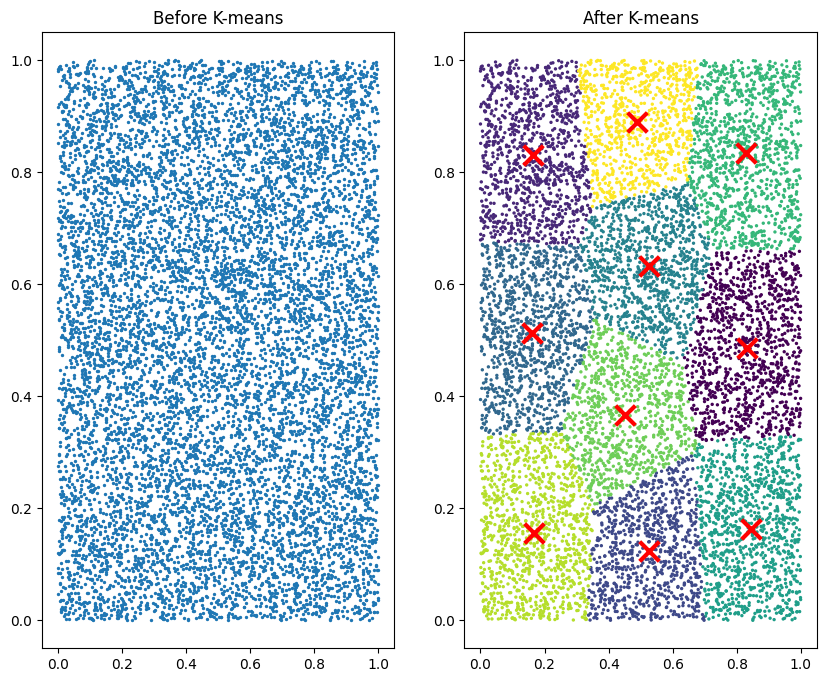

In [267]:
import numpy as np
import time
import matplotlib.pyplot as plt


def get_time():
    return time.strftime('%Y-%m-%d %H:%M:%S ',time.localtime())


np.random.seed(123)  # 设置随机种子，保证每次运行结果一致

# 生成数据
X = np.random.rand(10000, 2)


# 循环实现版本
def k_means_loop(X, K, max_iters=100):
    # randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False), :]
    
    for iter in range(max_iters):
        if (iter+1) % 10 == 0:
            print(get_time(), "iter:", iter+1)
        # assign each data point to its nearest centroid
        clusters = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            distances = np.sqrt(np.sum(np.square(X[i, :] - centroids), axis=1))
            clusters[i] = np.argmin(distances)
        # recompute centroids as the mean of the data points in each cluster
        for k in range(K):
            centroids[k, :] = np.mean(X[clusters == k, :], axis=0)
    return clusters, centroids


t0 = time.time()  # 记录开始时间
clusters, centroids = k_means_loop(X, K=10)  # 调用函数
t1 = time.time()  # 记录结束时间
print(f"总用时: {t1 - t0} 秒")


# plot data before K-means clustering
plt.rcParams['figure.figsize'] = (10, 8)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.title('Before K-means')

# plot data after K-means clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('After K-means')

# show the plot
plt.show()

#### 向量化版本

2024-03-18 12:30:46  iter: 10
2024-03-18 12:30:46  iter: 20
2024-03-18 12:30:46  iter: 30
2024-03-18 12:30:46  iter: 40
2024-03-18 12:30:46  iter: 50
2024-03-18 12:30:46  iter: 60
2024-03-18 12:30:46  iter: 70
2024-03-18 12:30:46  iter: 80
2024-03-18 12:30:46  iter: 90
2024-03-18 12:30:46  iter: 100
总用时: 0.22959089279174805 秒


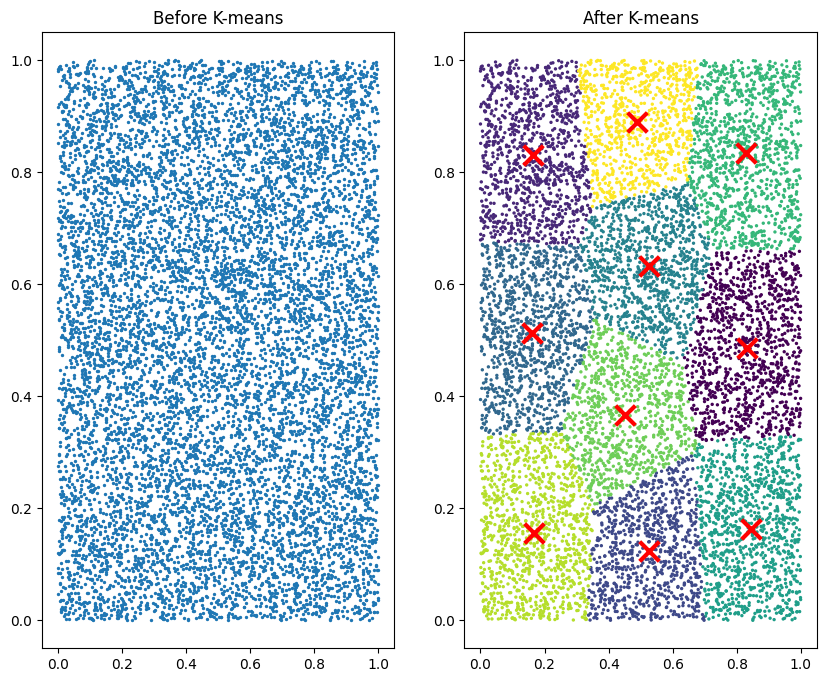

In [268]:
import numpy as np
import time
import matplotlib.pyplot as plt


def get_time():
    return time.strftime('%Y-%m-%d %H:%M:%S ',time.localtime())


np.random.seed(123)  # 设置随机种子，保证每次运行结果一致

# 生成数据
X = np.random.rand(10000, 2)


# 向量化实现版本
def k_means_vectorized(X, K, max_iters=100):
    
    # randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False), :]

    for iter in range(max_iters):
        if (iter+1) % 10 == 0:
            print(get_time(), "iter:", iter+1)

        #TODO
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(X, clusters, K)

    return clusters, centroids


t0 = time.time()  # 记录开始时间
clusters, centroids = k_means_vectorized(X, K=10)  # 调用函数
t1 = time.time()  # 记录结束时间
print(f"总用时: {t1 - t0} 秒")


# plot data before K-means clustering
plt.rcParams['figure.figsize'] = (10, 8)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.title('Before K-means')

# plot data after K-means clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('After K-means')

# show the plot
plt.show()

## K-means++算法
K-means++是K-means聚类算法的一个改进版，主要优化了质心的初始化过程。在标准K-means算法中，初始质心是随机选择的，这可能导致算法的结果对初始化过程非常敏感，有时甚至会导致较差的聚类效果。相比之下，K-means++通过一种更精心设计的方式来选择初始质心，目的是为了提高聚类结果的质量和稳定性。

K-means++的初始化过程遵循以下步骤：

1. **选择第一个质心**：从数据集中随机选择一个样本作为第一个质心。

2. **计算距离**：对于数据集中的每一个样本，计算其与已选择质心的距离的和。

3. **选择下一个质心**：选择下一个质心的***概率***与其到最近质心距离的平方成正比。也即离当前质心集合较远的点有更高的***概率***被选为下一个质心。

4. **重复步骤2和3**：重复上述过程直到选出所有K个质心。

5. **进入标准的K-means聚类过程**：一旦所有质心被初始化，算法就会进入标准的K-means算法过程。


In [269]:
def initialize_kmeans_plus_plus(X, K):
    #TODO
    # 从数据集中随机选择一个样本作为第一个质心
    centroids = [X[np.random.choice(range(X.shape[0]))]]
    
    for _ in range(1, K):
        # 计算每个样本到最近质心的距离
        distances = np.array([min([np.inner(x-c, x-c) for c in centroids]) # 计算x到所有质心的距离平方的最小值
                              for x in X])
        # 根据距离计算选择每个样本成为新质心的概率
        probabilities = distances / distances.sum()
        cumulative_probabilities = probabilities.cumsum() #累加，用于实现概率算法
        r = np.random.rand()
        
        # 根据概率选择一个新质心，注意概率算法的实现
        for j, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids.append(X[j])
                break

    return np.array(centroids)

In [270]:
def k_means_loop(X, K,initialize, max_iters=100):
    np.random.seed(123)
    if initialize == 'kmeans++':
        centroids = initialize_kmeans_plus_plus(X, K)
    else:
        centroids = X[np.random.choice(X.shape[0], K, replace=False), :]
    
    prev_clusters = np.zeros(X.shape[0], dtype=int)
    for iter in range(max_iters):
        print(get_time(), "iter:", iter+1)
        # assign each data point to its nearest centroid
        clusters = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            distances = np.sqrt(np.sum(np.square(X[i, :] - centroids), axis=1))
            clusters[i] = np.argmin(distances)
        if all(prev_clusters == clusters):
            break
        prev_clusters = clusters
        # recompute centroids as the mean of the data points in each cluster
        for k in range(K):
            centroids[k, :] = np.mean(X[clusters == k, :], axis=0)
    return clusters, centroids

#### 关注迭代次数与运行时间

In [272]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=3000, centers=10, cluster_std=0.60, random_state=0)
start = time.time()
clusters_kmeans, centroids_kmeans = k_means_loop(X, K=10, initialize='random')
end = time.time()
print(f"K-means运行时间: {end - start}秒")

start = time.time()
clusters_kmeans_pp, centroids_kmeans_pp = k_means_loop(X, K=10, initialize='kmeans++')
end = time.time()
print(f"K-means++运行时间: {end - start}秒")


2024-03-18 12:30:47  iter: 1
2024-03-18 12:30:47  iter: 2
2024-03-18 12:30:47  iter: 3
2024-03-18 12:30:47  iter: 4
2024-03-18 12:30:47  iter: 5
2024-03-18 12:30:47  iter: 6
2024-03-18 12:30:47  iter: 7
2024-03-18 12:30:47  iter: 8
2024-03-18 12:30:47  iter: 9
2024-03-18 12:30:47  iter: 10
2024-03-18 12:30:47  iter: 11
2024-03-18 12:30:47  iter: 12
2024-03-18 12:30:47  iter: 13
2024-03-18 12:30:47  iter: 14
2024-03-18 12:30:48  iter: 15
2024-03-18 12:30:48  iter: 16
2024-03-18 12:30:48  iter: 17
2024-03-18 12:30:48  iter: 18
2024-03-18 12:30:48  iter: 19
2024-03-18 12:30:48  iter: 20
2024-03-18 12:30:48  iter: 21
2024-03-18 12:30:48  iter: 22
2024-03-18 12:30:48  iter: 23
2024-03-18 12:30:48  iter: 24
2024-03-18 12:30:48  iter: 25
2024-03-18 12:30:48  iter: 26
2024-03-18 12:30:48  iter: 27
2024-03-18 12:30:48  iter: 28
K-means运行时间: 0.2983548641204834秒
2024-03-18 12:30:48  iter: 1
2024-03-18 12:30:48  iter: 2
2024-03-18 12:30:48  iter: 3
2024-03-18 12:30:48  iter: 4
2024-03-18 12:30:48 

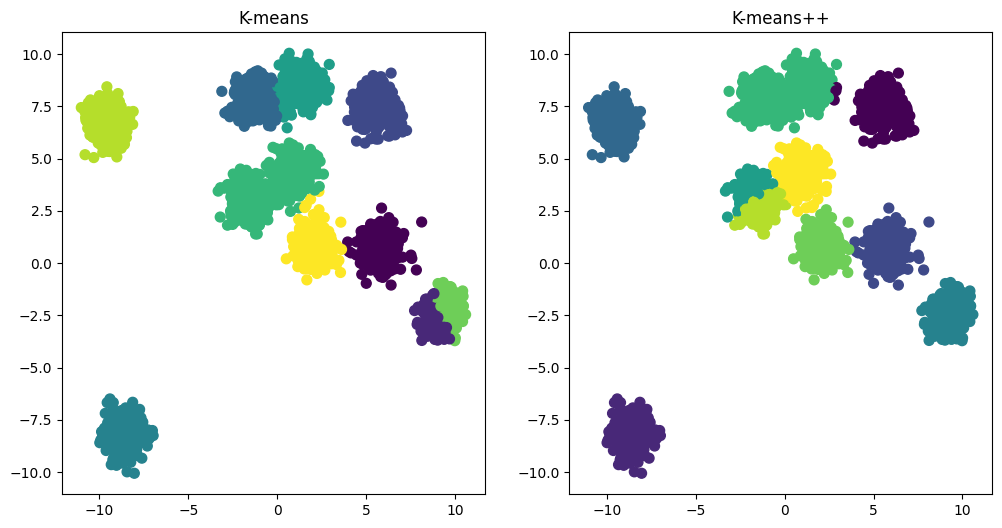

In [273]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, s=50, cmap='viridis')
plt.title("K-means")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans_pp, s=50, cmap='viridis')
plt.title("K-means++")

plt.show()
